# M3 - WEEK 5 | PROJECT: Make your data shine!
In this project, the data from the Austrailian marriage law postal survey in 2017 will be used. The data in accessable 
in the following link: https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1800.02017?OpenDocument

From that link, the following excel sheets are available:
- Response: "australian_marriage_law_postal_survey_2017_-_response_final.xls"
- Participation: "australian_marriage_law_postal_survey_2017_-_participation_final.xls"

## Import the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the data

In [2]:
# Setting the parameters for reading the data for the response sheet
usecols = 'A:G,I:P'
filename = "australian_marriage_law_postal_survey_2017_-_response_final.xls"

# Importing the data 
df1_response = pd.read_excel (filename, header = 6, sheet_name = "Table 2", usecols = usecols)

In [3]:
# Setting the parameters for reading the data for the participation sheet
filename = 'australian_marriage_law_postal_survey_2017_-_participation_final.xls'

# Importing the data into male and female dataframes.
# Table 5 and 6 contain the most complete data from the participation sheet. That's why those two will be chosen.
df2_male = pd.read_excel (filename, sheet_name = 'Table 5', header = 5)
df2_female = pd.read_excel (filename, sheet_name = 'Table 6', header = 5)

## Cleaning the data
In this chapter, the data from the three dataframes will be cleaned. The steps taken will be explained on each paragraph.

### Response 
The first data to be cleaned, is the response data. The steps taken will be as follows:
- Changing the column names to match better coding practices
- Removing null values
- Removing all rows that contain Total
- Changing the dtypes for the columns necessary

In [4]:
# Setting the parameters for the column names
col_names = ["area", "yes", "yes_pct", "no", "no_pct", "response_total", "response_total_pct", "response_clear",
             "response_clear_pct", "response_not_clear(b)", "response_not_clear(b)_pct", "non_responding",
             "non_responding_pct", "eligible_total", "eligible_total_pct"]

# Changing the column names
df1_response.columns = col_names

# Checking the amount of null values before and after cleaning it
print("Total sum of null values:", df1_response.isna().sum().sum())
df1_response = df1_response.dropna()
print("Total sum of null values:", df1_response.isna().sum().sum())

## Filter out rows that contain Total
# Set the parameters
fil = 'Total'

# Remove the rows that contain Total in the area column
df1_response = df1_response[~df1_response.area.str.contains((fil))]

# Display the data with the removed rows
display(df1_response.info())
display(df1_response.head())

Total sum of null values: 360
Total sum of null values: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 171
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area                       150 non-null    object 
 1   yes                        150 non-null    float64
 2   yes_pct                    150 non-null    float64
 3   no                         150 non-null    float64
 4   no_pct                     150 non-null    float64
 5   response_total             150 non-null    float64
 6   response_total_pct         150 non-null    float64
 7   response_clear             150 non-null    float64
 8   response_clear_pct         150 non-null    float64
 9   response_not_clear(b)      150 non-null    float64
 10  response_not_clear(b)_pct  150 non-null    float64
 11  non_responding             150 non-null    float64
 12  non_responding_pct         150 non-null    float

None

,area,yes,yes_pct,no,no_pct,response_total,response_total_pct,response_clear,response_clear_pct,response_not_clear(b),response_not_clear(b)_pct,non_responding,non_responding_pct,eligible_total,eligible_total_pct
1,Banks,37736.0,44.9,46343.0,55.1,84079.0,100.0,84079.0,79.9,247.0,0.2,20928.0,19.9,105254.0,100.0
2,Barton,37153.0,43.6,47984.0,56.4,85137.0,100.0,85137.0,77.8,226.0,0.2,24008.0,22.0,109371.0,100.0
3,Bennelong,42943.0,49.8,43215.0,50.2,86158.0,100.0,86158.0,81.0,244.0,0.2,19973.0,18.8,106375.0,100.0
4,Berowra,48471.0,54.6,40369.0,45.4,88840.0,100.0,88840.0,84.5,212.0,0.2,16038.0,15.3,105090.0,100.0
5,Blaxland,20406.0,26.1,57926.0,73.9,78332.0,100.0,78332.0,75.0,220.0,0.2,25883.0,24.8,104435.0,100.0


#### Changing the dtypes
The following columns will be changed to the appropiate data type:
- yes, no, response_total, response_clear, response_not_clear(b), non_responding, eligible_total: integer

In [5]:
# Setting the columns
ints = ['yes', 'no', 'response_total', 'response_clear', 'response_not_clear(b)', 'non_responding', 'eligible_total']

# Changing to int
df1_response[ints] = df1_response[ints].astype('int')

# Showing the results
display(df1_response.info())
display(df1_response.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 171
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area                       150 non-null    object 
 1   yes                        150 non-null    int32  
 2   yes_pct                    150 non-null    float64
 3   no                         150 non-null    int32  
 4   no_pct                     150 non-null    float64
 5   response_total             150 non-null    int32  
 6   response_total_pct         150 non-null    float64
 7   response_clear             150 non-null    int32  
 8   response_clear_pct         150 non-null    float64
 9   response_not_clear(b)      150 non-null    int32  
 10  response_not_clear(b)_pct  150 non-null    float64
 11  non_responding             150 non-null    int32  
 12  non_responding_pct         150 non-null    float64
 13  eligible_total             150 non-null    int32  

None

,area,yes,yes_pct,no,no_pct,response_total,response_total_pct,response_clear,response_clear_pct,response_not_clear(b),response_not_clear(b)_pct,non_responding,non_responding_pct,eligible_total,eligible_total_pct
1,Banks,37736,44.9,46343,55.1,84079,100.0,84079,79.9,247,0.2,20928,19.9,105254,100.0
2,Barton,37153,43.6,47984,56.4,85137,100.0,85137,77.8,226,0.2,24008,22.0,109371,100.0
3,Bennelong,42943,49.8,43215,50.2,86158,100.0,86158,81.0,244,0.2,19973,18.8,106375,100.0
4,Berowra,48471,54.6,40369,45.4,88840,100.0,88840,84.5,212,0.2,16038,15.3,105090,100.0
5,Blaxland,20406,26.1,57926,73.9,78332,100.0,78332,75.0,220,0.2,25883,24.8,104435,100.0


### Participation
For the participation, table 5 and 6 will be used. Those tables contains participation data for each gender, age_range and city. The steps to clean this data will be as follows:
- Replacing the columns names for both tables
- Get the areas seperately and remove nan values from it
- Add the gender column and set the values to associate gender
- Remove areas that contains Divisions, Australia, total or Include
- Repeat the areas column three times to refill in later
- Refill the clean area column
- Putting the age columns in the rows and create the 'age_range' column
- Drop nan values

After that, the dataframes will be merged and split based on the unique values of the 'measure' column.
Then some for looping to replace the 'count' column by the unique measure value will be applied and unnecessary will be dropped. Then the dataframes will be merged into one based on common keys of 'gender', 'area' and 'age_range'.

As the last step, the datatypes of some columns will be changed to appropiate ones.
#### Male data

In [6]:
# Replacing the columns names
cols = ["area", "measure","18-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49",
        "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+", "total_for_gender"]

df2_male.columns = cols

# Get the areas seperately
areas_male = df2_male.iloc[:, 0]
results_male = df2_male.iloc[:, 1:]

results_male = results_male.dropna()

# Add the gender column and set the values to 'Male'
results_male['gender'] = 'Male'

# Remove areas that contains Divisions, Australia, total or Include
fil = 'Divisions|Australia|Include|total'
areas_male = areas_male[areas_male.str.contains(fil) == False]

# Repeat the areas column three times to refill in later
areas_male = [area for area in areas_male for i in range(4)]

# Refill the area column
results_male['area'] = pd.Series(areas_male)

# Putting the age columns in the rows and create the 'age_range' column
results_male = results_male.melt(id_vars = ['measure', 'gender', 'area', 'total_for_gender'], 
                       var_name = "age_range", value_name = 'count')


# Drop nan values and display the final info of the dataframe
results_male = results_male.dropna()
display(results_male.info())
display(results_male.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6945 entries, 0 to 7140
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   measure           6945 non-null   object 
 1   gender            6945 non-null   object 
 2   area              6945 non-null   object 
 3   total_for_gender  6945 non-null   float64
 4   age_range         6945 non-null   object 
 5   count             6945 non-null   float64
dtypes: float64(2), object(4)
memory usage: 379.8+ KB


None

,measure,gender,area,total_for_gender,age_range,count
0,Total participants,Male,Banks,39680.0,18-19,1102.0
1,Eligible participants,Male,Banks,50528.0,18-19,1431.0
2,Participation rate (%),Male,Banks,78.5,18-19,77.0
3,Total participants,Male,Barton,41088.0,18-19,977.0
4,Eligible participants,Male,Barton,53616.0,18-19,1278.0


#### Female data

In [7]:
# Rename the columns in the female dataframe
df2_female.columns = cols

# Get the areas and results seperately
areas_female = df2_female.iloc[:, 0]
results_female = df2_female.iloc[:, 1:]

# Drop nan values from the results dataframe
results_female = results_female.dropna()

# Adding the gender column and assign it to female
results_female['gender'] = 'Female'

# Remove values that contain divisions, australia, includes and total
fil = 'Divisions|Australia|Includes|total'
areas_female = areas_female[areas_female.str.contains(fil) == False]

# Repeat the areas column three times to refill in later
areas_female = [area for area in areas_female for i in range(4)]

# Refill the dataframe with the area columns
results_female['area'] = pd.Series(areas_female)

# Putting the age columns in the rows
results_female = results_female.melt(id_vars = ['measure', 'gender', 'area', 'total_for_gender'], 
                       var_name = "age_range", value_name = 'count')

# Dropping nan values and displaying the final female dataframe
results_female = results_female.dropna()
display(results_female.info())
display(results_female.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6945 entries, 0 to 7140
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   measure           6945 non-null   object 
 1   gender            6945 non-null   object 
 2   area              6945 non-null   object 
 3   total_for_gender  6945 non-null   float64
 4   age_range         6945 non-null   object 
 5   count             6945 non-null   float64
dtypes: float64(2), object(4)
memory usage: 379.8+ KB


None

,measure,gender,area,total_for_gender,age_range,count
0,Total participants,Female,Banks,44166.0,18-19,1253.0
1,Eligible participants,Female,Banks,54154.0,18-19,1514.0
2,Participation rate (%),Female,Banks,81.6,18-19,82.8
3,Total participants,Female,Barton,43879.0,18-19,1061.0
4,Eligible participants,Female,Barton,55290.0,18-19,1309.0


#### Combining the two dataframes

In [8]:
# Combining the two datasets into one
final_df = (results_male.merge(results_female, how = 'outer'))

# Split the datafram based on measure
dfs = [y for x, y in final_df.groupby('measure', as_index = False, sort = False)]

# Initialise empty dataframe 
final_df = pd.DataFrame()

# Apply some for looping to replace the 'count' column by measure and drop
# the measure and total. Also combine each created dataframe into one

for df in range(len(dfs)):
    # Set the count columns to the measure value
    measure = (dfs[df].measure.unique()[0]).lower().replace(" ", "_")
    dfs[df] = dfs[df].rename(columns = {'count': measure})
    
    # Drop the unnessary columns meare and total for gender
    dfs[df] = dfs[df].drop(['measure', 'total_for_gender'], axis = 1)    
    
    # If the final df is empty, the df will be set to the first df splitted
    if final_df.empty == True:
        final_df = dfs[df]
    # Else, merge the dataframe with the other dataframe based on gender, age and age_range
    else:
        final_df = final_df.merge(dfs[df], on = ['gender', 'area', 'age_range'], how = 'inner')
    
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4530 entries, 0 to 4529
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  4530 non-null   object 
 1   area                    4530 non-null   object 
 2   age_range               4530 non-null   object 
 3   total_participants      4530 non-null   float64
 4   eligible_participants   4530 non-null   float64
 5   participation_rate_(%)  4530 non-null   float64
dtypes: float64(3), object(3)
memory usage: 247.7+ KB


#### Changing the column data types
Last step is to change the columns data types to an approiate one. The following columns will be changed:
- gender, age_range: catagory
- total_participants, eligible_participants: int

In [9]:
cats = ['gender', 'age_range']
ints = ['total_participants', 'eligible_participants']

# Change to the category types
final_df[cats] = final_df[cats].astype('category')

# Change to the integer types
final_df[ints] = final_df[ints].astype('int')

# Check the results
display(final_df.info())
display(final_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4530 entries, 0 to 4529
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  4530 non-null   category
 1   area                    4530 non-null   object  
 2   age_range               4530 non-null   category
 3   total_participants      4530 non-null   int32   
 4   eligible_participants   4530 non-null   int32   
 5   participation_rate_(%)  4530 non-null   float64 
dtypes: category(2), float64(1), int32(2), object(1)
memory usage: 151.2+ KB


None

,gender,area,age_range,total_participants,eligible_participants,participation_rate_(%)
0,Male,Banks,18-19,1102,1431,77.0
1,Male,Barton,18-19,977,1278,76.4
2,Male,Bennelong,18-19,1177,1488,79.1
3,Male,Berowra,18-19,1523,1916,79.5
4,Male,Blaxland,18-19,1152,1555,74.1


## Data Analysis & Visualization 

### Final Response results YES or NO 


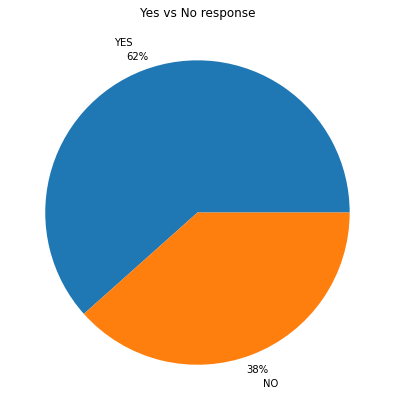

In [20]:
# summarizing all yes and no responses
total_yes= df1_response['yes'].sum()
total_no=df1_response['no'].sum()

# Preparing the values and lables in list to pass to the pie chart 
vlaues_yes_no=[total_yes,total_no]
labels=['YES','NO']

#pie chart settings using matplotlib 'plt'
fig = plt.figure(figsize =(10, 7))
ax=plt.pie(vlaues_yes_no, labels = labels,startangle = 0 ,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Yes vs No response")
plt.show()


This Figure shows that the Yes voting is the final with 62% 

### Top Areas response YES or NO

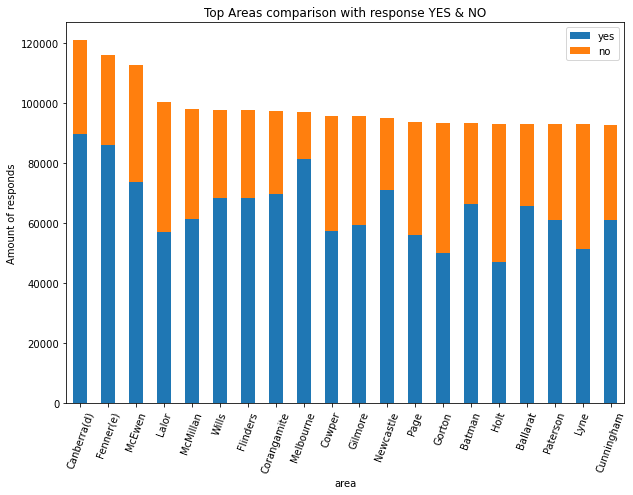

In [32]:
# sort based on response_total and get top 20 , to use in the bar chart as we have too many areas 
df12= df1_response.sort_values('response_total',ascending = False).head(20)

# bar chart setting 
df12.plot(kind='bar',stacked=True,x="area", y=["yes","no"], rot=70, title="Top Areas comparison with response YES & NO",
         figsize = (10, 7))
plt.ylabel("Amount of responds")
plt.show()

This figure shows the highest area of participation and voting percentage for yes or no 

### Participation Comparison Females vs Males

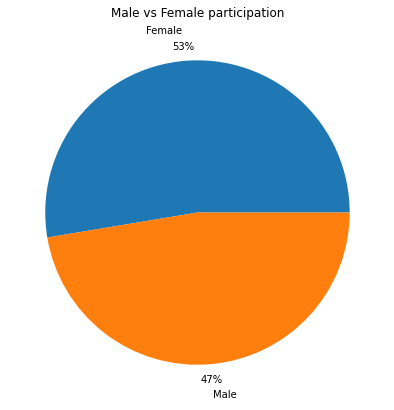

In [33]:
# group the data based on the gender and sum all total participants
groupby_gender=final_df.groupby(['gender'])['total_participants'].agg('sum')

# blot setting on Pie chart
fig = plt.figure(figsize =(10, 7))
plt.pie(groupby_gender,labels=['Female','Male'],autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Male vs Female participation")
plt.show()

This fgure shows that females are participating more than males :) 

### Age Range Participation Comparison

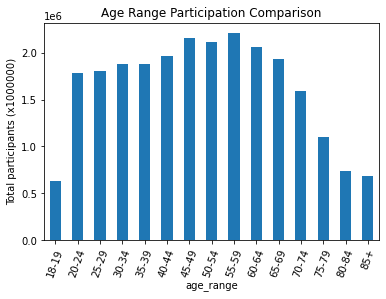

In [26]:
# Group by age range , and sum all aprticipants 
groupby_age_range=final_df.groupby(['age_range'])['total_participants'].agg('sum')
# plot setting "bar chart"
groupby_age_range.plot(kind='bar',stacked=True,x="total_participants", y="age_range", rot=70, title="Age Range Participation Comparison")
plt.ylabel("Total participants (x1000000)")
plt.show()

This Figure shows that the age range (55-59) are the highest in participation and range 18-19 are the lowest range 

### Age range in participation rate

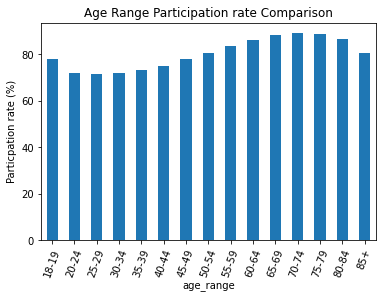

In [21]:
# Group by age range , and apply mean statistic to all participation rate 
groupby_age_range=final_df.groupby(['age_range'])['participation_rate_(%)'].agg('mean')
# plot setting "bar chart"
groupby_age_range.plot(kind='bar',stacked=True,x="total_participants", y="age_range", rot=70, 
                       title="Age Range Participation rate Comparison")
plt.ylabel("Particpation rate (%)")
plt.show()

This figure shows that the average participation rate has less difference than the total number of people that voted

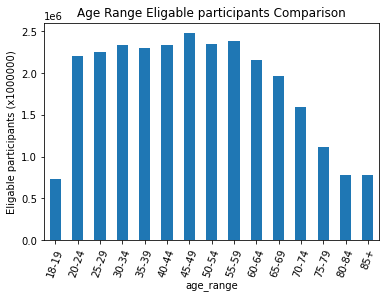

In [24]:
# Group by age range , and and sum all aprticipants
groupby_age_range=final_df.groupby(['age_range'])['eligible_participants'].agg('sum')

# plot setting "bar chart"
groupby_age_range.plot(kind='bar',stacked=True,x="total_participants", y="age_range", rot=70, 
                       title="Age Range Eligable participants Comparison")
plt.ylabel("Eligable participants (x1000000)")
plt.show()